<Figure size 1500x600 with 0 Axes>

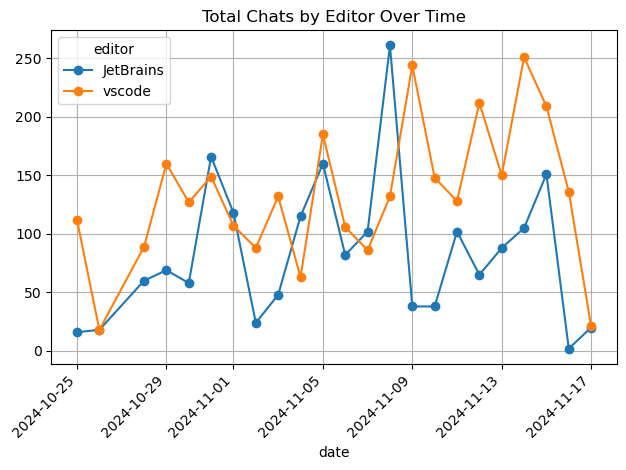

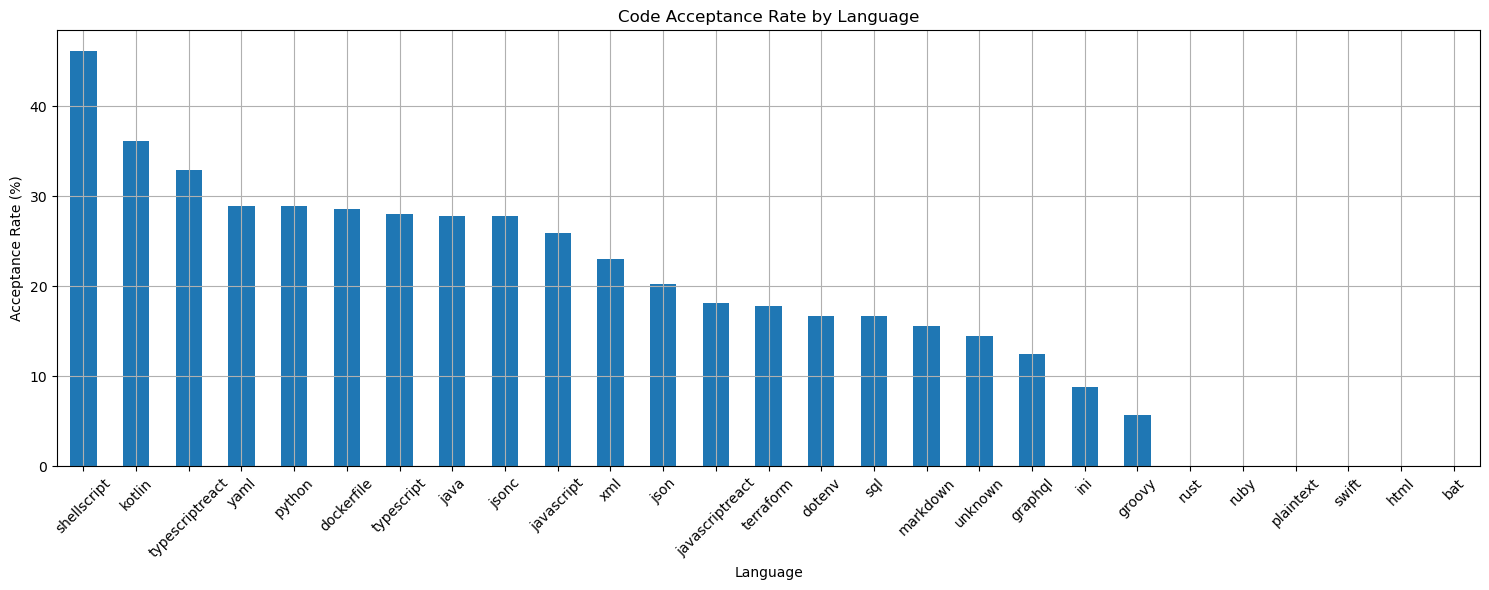

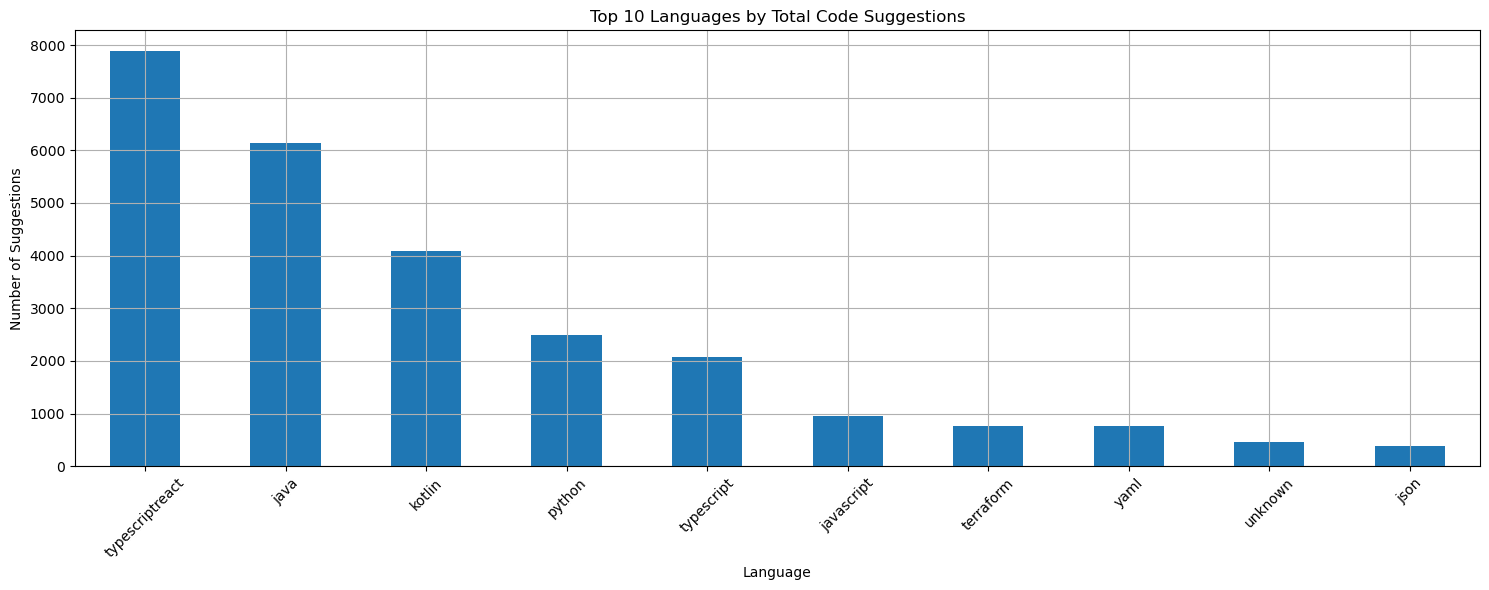

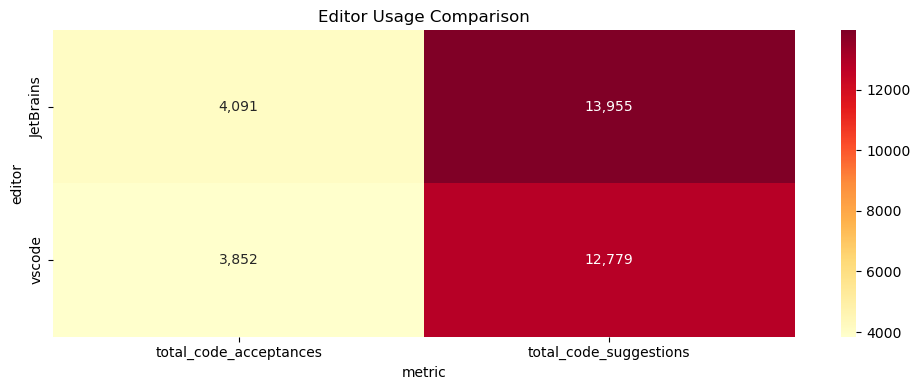

<Figure size 1500x600 with 0 Axes>

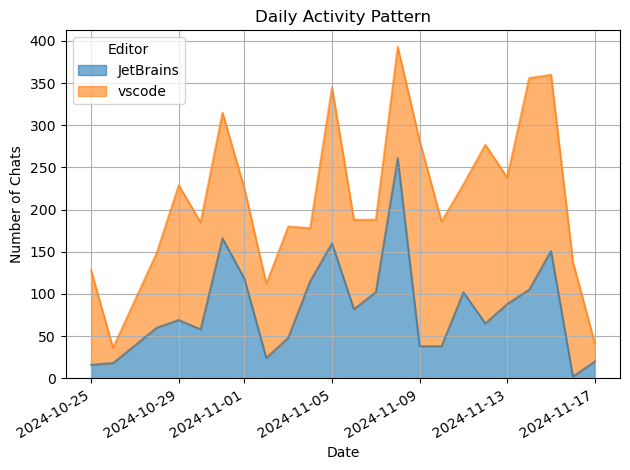

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Read the data
df = pd.read_csv('data.csv')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Create a Jupyter notebook to analyze the data
markdown = """# Code Usage Analysis Dashboard

This notebook analyzes code usage patterns across different editors and languages.

## Data Overview"""

# 1. Total Chats by Editor Over Time
plt.figure(figsize=(15, 6))
chat_data = df[df['metric'] == 'total_chats'].pivot(index='date', columns='editor', values='value')
chat_data.plot(marker='o')
plt.title('Total Chats by Editor Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 2. Code Acceptance Rate by Language
code_suggestions = df[df['metric'] == 'total_code_suggestions'].groupby('language')['value'].sum()
code_acceptances = df[df['metric'] == 'total_code_acceptances'].groupby('language')['value'].sum()
acceptance_rate = (code_acceptances / code_suggestions * 100).round(2)

plt.figure(figsize=(15, 6))
acceptance_rate.sort_values(ascending=False).plot(kind='bar')
plt.title('Code Acceptance Rate by Language')
plt.xlabel('Language')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# 3. Top Languages by Total Code Suggestions
plt.figure(figsize=(15, 6))
total_suggestions = df[df['metric'] == 'total_code_suggestions'].groupby('language')['value'].sum()
total_suggestions.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Languages by Total Code Suggestions')
plt.xlabel('Language')
plt.ylabel('Number of Suggestions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# 4. Editor Usage Comparison (Heatmap)
pivot_data = df[df['metric'].isin(['total_code_suggestions', 'total_code_acceptances'])].pivot_table(
    index='editor',
    columns='metric',
    values='value',
    aggfunc='sum'
)

plt.figure(figsize=(10, 4))
sns.heatmap(pivot_data, annot=True, fmt=',d', cmap='YlOrRd')
plt.title('Editor Usage Comparison')
plt.tight_layout()

# 5. Daily Activity Pattern
daily_activity = df[df['metric'] == 'total_chats'].groupby(['date', 'editor'])['value'].sum().unstack()
plt.figure(figsize=(15, 6))
daily_activity.plot(kind='area', stacked=True, alpha=0.6)
plt.title('Daily Activity Pattern')
plt.xlabel('Date')
plt.ylabel('Number of Chats')
plt.grid(True)
plt.legend(title='Editor')
plt.tight_layout()

# Summary statistics
summary_stats = f"""
## Summary Statistics

1. Total number of chats: {df[df['metric'] == 'total_chats']['value'].sum():,}
2. Total code suggestions: {df[df['metric'] == 'total_code_suggestions']['value'].sum():,}
3. Total code acceptances: {df[df['metric'] == 'total_code_acceptances']['value'].sum():,}
4. Overall acceptance rate: {(df[df['metric'] == 'total_code_acceptances']['value'].sum() / df[df['metric'] == 'total_code_suggestions']['value'].sum() * 100):.2f}%
5. Number of unique languages: {df['language'].nunique()}
"""

# Display all plots and statistics
plt.show()